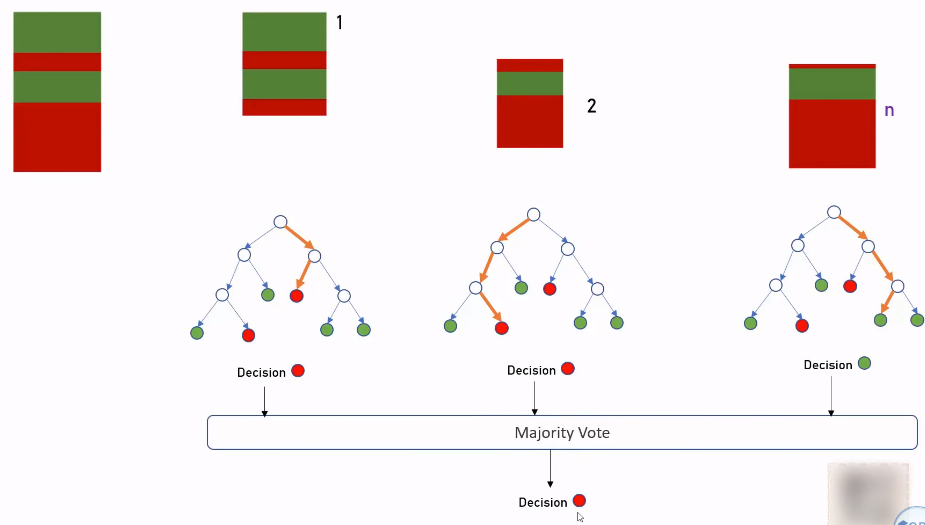

For the random forest method, firstly, in the training section, the data set is divided into small pieces, and different decision trees are extracted from each subframe. Afterward, when we move on to the prediction part, the prediction, which is the analysis of the outputs of the majority of the decision trees, is accepted as "majority vote". In summary, in analyzing and modeling a data set, we create a forest from different decision trees and try to obtain the correct prediction specified by the majority.

In [1]:
#In this project, sklearn digits data set will be used to make a classification using random forest.

In [2]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

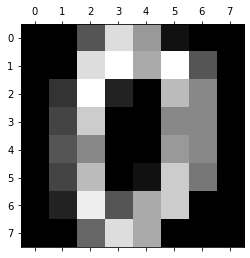

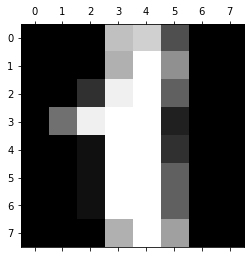

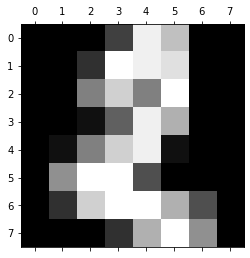

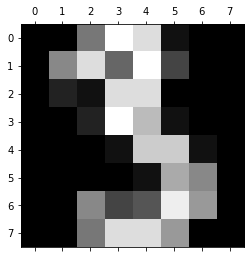

In [4]:
#Visualize the data:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [5]:
#Each element's lenght is 8*8 = 64 integers
df = pd.DataFrame(digits.data)
df.head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

In [6]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
#Create new column as target: 
#OPTIONAL!!! it is just for info, not necessary for the project. That's why we drop the target column in the next cell!
df['target'] = digits.target
df.head()

0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]

In [10]:
#Training model:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis=1), digits.target, test_size = 0.2)

In [11]:
len(X_test)

360

In [12]:
#Ensemble is used when multiple algorithms are used for the outcome:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [13]:
model.score(X_test, y_test)

0.9694444444444444

In [14]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(n_estimators=40)
model2.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [16]:
model2.score(X_test, y_test)

0.9666666666666667

In [17]:
#Check the confusions of the model:
y_predicted = model.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[28,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 36,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 48,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 37,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 29,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0, 31]], dtype=int64)

Text(69.0, 0.5, 'Truth')

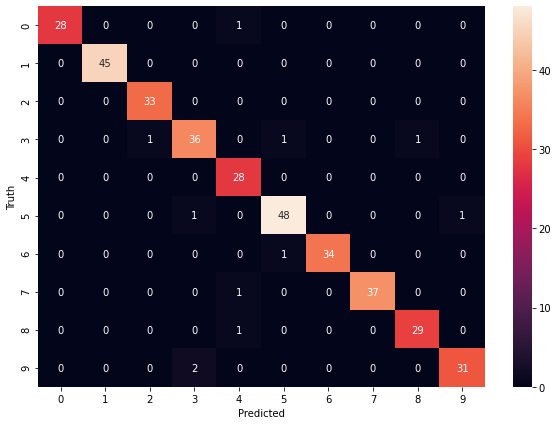

In [19]:
#Visualize the confuison matrix with seaborn:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")